<a href="https://colab.research.google.com/github/IsraelAbebe/COVID-19-Chatbot/blob/master/LDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [192]:
!pip install pyLDAvis --q

In [193]:
import pandas as pd
import re

### Read Dataset from 

In [174]:
twb_data = pd.read_excel("Copy of twb-chatbot-data.xlsx")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   ask_for_stats                   25 non-null     object
 1   covid_call_a_doctor             10 non-null     object
 2   covid_disinfect                 6 non-null      object
 3   covid_explain_pandemic          6 non-null      object
 4   covid_gloves                    19 non-null     object
 5   covid_hospital                  8 non-null      object
 6   covid_how_spread                9 non-null      object
 7   covid_infection_sources         14 non-null     object
 8   covid_masks_how_to              13 non-null     object
 9   covid_masks_effectiveness       17 non-null     object
 10  covid_myth_antibiotics          7 non-null      object
 11  covid_myth_mosquitos            7 non-null      object
 12  covid_myth_only_old             7 non-null      obje

### Visualize Dataset

In [175]:
data.head()

,ask_for_stats,covid_call_a_doctor,covid_disinfect,covid_explain_pandemic,covid_gloves,covid_hospital,covid_how_spread,covid_infection_sources,covid_masks_how_to,covid_masks_effectiveness,covid_myth_antibiotics,covid_myth_mosquitos,covid_myth_only_old,covid_myth_UV,covid_protection,covid_protection_wash_hands,covid_protection_keep_distance,covid_risk_most_at_risk,covid_SARS,covid_stress,covid_symptoms,covid_treatments,covid_wash_hands_how,covid_what_is_corona_covid-19,covid_myth_hot_tea
0,What are the current COVID-19 statistics for DRC?,Where can I get tested?,Can disinfectant hurt me in any way?,What's a pandemic?,Should I wear gloves to protect against COVID?,Should I go to the hospital if I have corona?,How do people catch the virus?,I wanted to know the origin not the treatment,How should I wear a mask?,What kind of mask should I wear?,Is there any proof of antibiotics killing COVI...,Is it true that you can get corona form mosqui...,Can young people get infected with COVID-19?,Does ultraviolet light disinfect against COVID...,I need protection from the virus?,Why should you wash your hands?,Do I have to be away from people to avoid corona?,Why do whites die more than blacks?,Is corona SARS?,Are there any resources to help cope with stress?,What are the signs of Covid-19?,Do cold temperatures kill COVID-19?,Is sanitizer better than soap?,Are covid-19 and coronavirus the same thing?,It is also said that hot tea with ginger can c...
1,Statistics for DRC?,What should I do if I have symptoms?,Do I have to use disinfectant?,What's the difference between a pandemic and a...,Does wearing gloves help?,Do I need to visit a doctor if I have covid?,How do people catch the disease?,What is the origin of the coronavirus,Was your mask made here at home or from other ...,Anyone who wears a mask can't get a corona?,How do antibiotics prevent infection of COVID-19?,Can a mosquito bite contain corona?,Who is most likely to get infected with the co...,IS it possible to use ultaviolet light to disi...,What's the best way to protect against coronav...,Why wash your hands?,How far should I be from people?,Why don't crazy people get coronavirus?,Is corona different from SARS?,How can I keep my mental health up during quar...,What are the symptoms,Has research found a cure for Covid-19?,Should I use sanitizer instead of soap?,Can you explain what coronavirus is?,"hot tea, can it treat corona"
2,What's the total number of people tested posit...,I have a dry cough and fever,Is drinking disinfectant bad for me?,What's the difference between a epidemic and a...,Will gloves protect me?,Should I just stay at home if i have the disease?,How can I catch the disease?,What country is COVID-19 from?,Do you have to wear a mask every day?,When does the mask help?,Can corona be cured with antibiotics?,Can mosquitos transfer the coronavirus?,Can only old people get COVID-19?,How does ultraviolet light disinfect?,What's the best way to protect against covid-19,How should I wash my hands?\n,Should I be away from anyone?,Is the coronavirus more dangerous to some people?,How is the coronavirus different from SARS?,How do I deal with stress during quarantine?,What are the signs of being sick with coronavi...,Can people be cured of COVID-19?,How long should I wash my hands?,Can you explain what COVID-19 is?,If someone takes hot tea they will not be infe...
3,How many people have tested positive for coron...,Should I call a doctor?,Should I drink disinfectant?,Why is coronavirus called a pandemic?,Are gloves a good idea?,Is it okay to not go to the hospital if I have...,How does the disease spread?,Where does Corona come from?,How should you wear a mask?,Does the mask send missiles to catch the coron...,Are there any antibiotics that can kill the co...,Is there any way a mosquito can give me COVID-19?,Who is most likely to get corona?,Is it true that ultraviolet light kills COVID-19?,How can I stop the virus from spreading?,How to wash your hands,NaN,NaN,NaN,NaN,NaN,

### Convert the dataset into new format to make it easy for training

In [176]:
data_dict = data.to_dict()
new_data_dict = []
for i in data_dict.keys():
    for j in data_dict[i].values():
        if str(j) != 'nan':
            new_data_dict.append([i,j])

In [177]:
new_data = pd.DataFrame(new_data_dict)
new_data.columns = ['Topic','Text']
new_data.head()

,Topic,Text
0,ask_for_stats,What are the current COVID-19 statistics for DRC?
1,ask_for_stats,Statistics for DRC?
2,ask_for_stats,What's the total number of people tested posit...
3,ask_for_stats,How many people have tested positive for coron...
4,ask_for_stats,"If I am away from someone who is infected, I w..."


In [178]:
new_data['Topic'] = new_data['Topic'].map(lambda x: re.sub('[\d,.!?]', '', x))
new_data['Text'] = new_data['Text'].map(lambda x: re.sub('[\d,.!?]', '', x))

new_data['Topic'] = new_data['Topic'].map(lambda x: x.lower())
new_data['Text'] = new_data['Text'].map(lambda x: x.lower())

new_data['Topic'] = new_data['Topic'].map(lambda x: x.strip())

len(new_data.Topic.unique())

25

In [191]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 296 entries, 0 to 295
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Topic   296 non-null    object
 1   Text    296 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [180]:
new_data.head()

,Topic,Text
0,ask_for_stats,what are the current covid- statistics for drc
1,ask_for_stats,statistics for drc
2,ask_for_stats,what's the total number of people tested posit...
3,ask_for_stats,how many people have tested positive for coron...
4,ask_for_stats,if i am away from someone who is infected i wi...


# EDA

# Getting Most Friquent Words

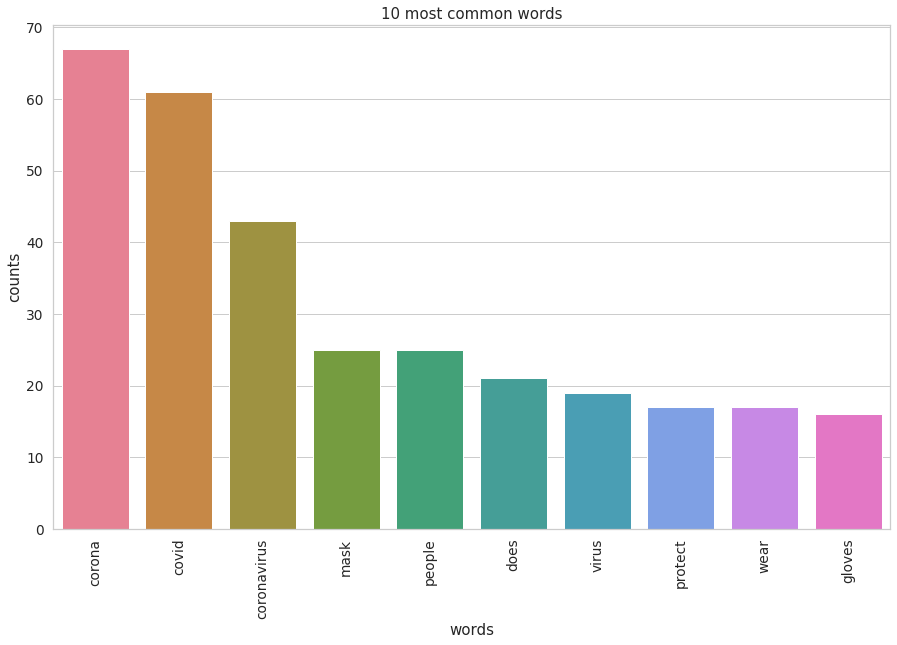

In [181]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()


count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(new_data['Text'])
plot_10_most_common_words(count_data, count_vectorizer)


# LDA Model 

In [190]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [182]:
from sklearn.decomposition import LatentDirichletAllocation as LDA      


number_topics = 25
number_words = 20
lda = LDA(n_components=number_topics, n_jobs=-1)
lda.fit(count_data)

print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
light use ultraviolet does soap sick sanitizer coronavirus signs surface sterilize better transfer mosquitos disinfect instead kill true kills ultaviolet

Topic #1:
prevent corona mask wearing does covid hospital infected catching antibiotics far away person infection okay sick won point stop help

Topic #2:
virus tea corona hot catch drink send disease crown cure said infections ginger regularly free amo containing effective sick vaccines

Topic #3:
corona help animals gants won coronavirus resources cope helped sausage stress stick avoid kind instead crown getting gloves wear sanitizer

Topic #4:
wear mask away know drinking wanted important treatment origin bad disinfectant total missiles number kind don properly tell correct day

Topic #5:
coronavirus antibiotics kill covid treat bad flu like say illness created recover origin cured people virus cure does prevent corona

Topic #6:
covid people congo succumbed zone good gloves ginger getting gerome g

In [183]:
%%time
import os
from pyLDAvis import sklearn as sklearn_lda
import pickle 
import pyLDAvis

LDAvis_data_filepath = os.path.join('./ldavis_prepared_'+str(number_topics))

if 1 == 1:
    LDAvis_prepared = sklearn_lda.prepare(lda, count_data, count_vectorizer)

with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
        
with open(LDAvis_data_filepath,'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, './ldavis_prepared_'+ str(number_topics) +'.html')

CPU times: user 517 ms, sys: 6.86 ms, total: 524 ms
Wall time: 2.18 s


In [184]:
from IPython.display import HTML

HTML(filename='./ldavis_prepared_'+ str(number_topics) +'.html')

# Predict New

In [189]:
np.argmax(lda.transform([count_data.toarray()[13]]))

13